# Import packages

In [ ]:
import pandas as pd
import numpy as np
import math
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load the data

In [ ]:
LD = pd.read_csv("/content/gdrive/My Drive/COMP 565/LD.csv", compression='gzip')
LD = LD.drop("Unnamed: 0", axis = 1)
LD.index = LD.columns
LD

,rs7771989,rs4307191,rs10499125,rs7349870,rs6905496,rs7749215,rs1535356,rs1535355,rs4897288,rs7738709,...,rs1817299,rs342660,rs12332863,rs342657,rs17085668,rs342639,rs554333,rs9482443,rs9885799,rs9482449
rs7771989,1.064881,0.197698,0.196758,-0.130645,0.119351,-0.132378,-0.013994,-0.015007,0.119351,-0.067151,...,-0.021229,-0.053181,-0.021229,-0.026140,-0.021229,-0.053181,-0.053181,0.021223,0.023976,0.037801
rs4307191,0.197698,0.997479,0.992459,0.887314,0.920591,0.883226,-0.430428,-0.429678,0.920591,0.147375,...,0.074146,0.021373,0.074146,0.064579,0.074146,0.021373,0.021373,0.016538,0.015588,-0.034668
rs10499125,0.196758,0.992459,0.996529,0.887261,0.920250,0.883114,-0.430661,-0.429935,0.920250,0.146178,...,0.072855,0.020096,0.072855,0.062555,0.072855,0.020096,0.020096,0.020950,0.020091,-0.027314
rs7349870,-0.130645,0.887314,0.887261,0.987258,0.943209,0.984006,-0.405672,-0.404347,0.943209,-0.073411,...,0.059226,-0.020629,0.059226,0.024859,0.059226,-0.020629,-0.020629,-0.022752,-0.025468,-0.078307
rs6905496,0.119351,0.920591,0.920250,0.943209,0.991948,0.949257,-0.437297,-0.436222,0.991948,-0.090470,...,0.055839,-0.034411,0.055839,0.021901,0.055839,-0.034411,-0.034411,-0.030583,-0.032644,-0.089479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs342639,-0.053181,0.021373,0.020096,-0.020629,-0.034411,-0.022090,-0.058505,-0.059308,-0.034411,0.151000,...,-0.050582,1.107524,-0.050582,0.573280,-0.050582,1.107524,1.039779,-0.069267,-0.067526,-0.031940
rs554333,-0.053181,0.021373,0.020096,-0.020629,-0.034411,-0.022090,-0.058505,-0.059308,-0.034411,0.151000,...,-0.050582,1.039779,-0.050582,0.535238,-0.050582,1.039779,1.107524,-0.069267,-0.067526,-0.031940
rs9482443,0.021223,0.016538,0.020950,-0.022752,-0.030583,-0.025796,0.010112,0.008229,-0.030583,0.028351,...,0.534244,-0.069267,0.534244,0.472693,0.534244,-0.069267,-0.069267,0.997172,0.984594,0.709010
rs9885799,0.023976,0.015588,0.020091,-0.025468,-0.032644,-0.028459,0.017431,0.015571,-0.032644,0.031280,...,0.540077,-0.067526,0.540077,0.479267,0.540077,-0.067526,-0.067526,0.984594,0.995477,0.716832


In [ ]:
beta_marginal = pd.read_csv("/content/gdrive/My Drive/COMP 565/beta_marginal.csv", compression='gzip')
beta_marginal = beta_marginal.rename({'Unnamed: 0': 'SNP', 'V1': 'beta'}, axis='columns')
beta_marginal

,SNP,beta
0,rs7771989,0.468890
1,rs4307191,-0.008021
2,rs10499125,-0.013560
3,rs7349870,-0.156780
4,rs6905496,-0.053321
...,...,...
95,rs342639,-0.034820
96,rs554333,-0.038372
97,rs9482443,0.033856
98,rs9885799,0.038899


In [ ]:
X_train = pd.read_csv("/content/gdrive/My Drive/COMP 565/X_train.csv", compression='gzip')
colname = X_train["Unnamed: 0"].to_numpy()
X_train = X_train.drop("Unnamed: 0", axis = 1)
X_train.index = colname

In [ ]:
X_test = pd.read_csv("/content/gdrive/My Drive/COMP 565/X_test.csv", compression='gzip')
colname = X_test["Unnamed: 0"].to_numpy()
X_test = X_test.drop("Unnamed: 0", axis = 1)
X_test.index = colname

In [ ]:
y_train = pd.read_csv("/content/gdrive/My Drive/COMP 565/y_train.csv", compression='gzip')
y_train = y_train.rename({'Unnamed: 0': 'phenotype', 'V1': 'beta'}, axis='columns')

In [ ]:
y_test = pd.read_csv("/content/gdrive/My Drive/COMP 565/y_test.csv", compression='gzip')
y_test = y_test.rename({'Unnamed: 0': 'genotype', 'V1': 'beta'}, axis='columns')

# 1 Expectation Step & 2 Maximization Step

In [ ]:
M= 100 # number of SNP
N_train = 439
N_test = 50
tau_e = 1
tau_beta = 200
pi = 0.01

In [ ]:
SNP = LD.index.to_numpy()

In [ ]:
def EMalgo(tau_e = tau_e, tau_beta = tau_beta, pi = pi):
  mu = []
  tau = []
  gamma =[]
  for i in range(M):
    mu.append(0)
    tau.append(1)
    gamma.append(0.01)

  LD_alt = LD.copy()
  LD_alt["mu"] = mu
  LD_alt["tau"] = tau
  LD_alt["gamma"] = gamma
  
  # For 10 iterations
  for i in range(10):
    # loop through all SNPs
    for snp_j in SNP:

      # 1. E-step

      # calculate and update tau_betaj
      tau_betaj = N_train*tau_e+tau_beta
      LD_alt.loc[snp_j, "tau"] = tau_betaj

      # calculate and update mu_betaj
      beta_mj = beta_marginal.copy()
      beta_marginal_j = beta_mj.loc[beta_marginal["SNP"] == snp_j, "beta"]
      beta_marginal_j = beta_marginal_j.values[0]

      sum_j = LD_alt[[snp_j, "mu", "tau", "gamma"]].copy()
      sum_ij = sum_j.drop(snp_j)
      sum_i = (sum_ij["gamma"]*sum_ij["mu"]*sum_ij[snp_j]).sum()

      mu_betaj = N_train * (tau_e / tau_betaj) * (beta_marginal_j - sum_i)
      LD_alt.loc[snp_j, 'mu'] = mu_betaj

      # calculate and update gamma_j
      u_j = math.log(pi/(1-pi)) + 0.5*math.log(tau_beta/tau_betaj) + (tau_betaj / 2)*(mu_betaj**2)
      gamma_j = 1 / (1+ math.exp(-u_j))
      LD_alt.loc[snp_j, 'gamma'] = gamma_j

    snp = LD_alt[["mu", "tau", "gamma"]].copy()
    snp.loc[snp["gamma"] < 0.01, "gamma"] = 0.01
    snp.loc[snp["gamma"] > 0.99, "gamma"] = 0.99

    # 2. M-step

    # update tau_beta
    gammaj = snp["gamma"].copy()
    muj = snp["mu"].copy()
    tauj = snp["tau"].copy()

    tb = (gammaj * (muj**2 + 1/tauj)).sum() / gammaj.sum()
    tau_beta = tb**(-1)

    # update pi
    pi = gammaj.sum() / M

  return tau_e, tau_beta, pi


In [ ]:
tau_e, tau_beta, pi = EMalgo()

Print the parameters

In [ ]:
tau_e

1

In [ ]:
tau_beta

5.543237675672559

In [ ]:
pi

0.030717441092843023

# 3 Evidence Lower Bound

In [ ]:
def ELBO(tau_e = 1, tau_beta = 200, pi = 0.01):
  mu = []
  tau = []
  gamma =[]
  for i in range(M):
    mu.append(0)
    tau.append(1)
    gamma.append(0.01)

  LD_alt = LD.copy()
  LD_alt["mu"] = mu
  LD_alt["tau"] = tau
  LD_alt["gamma"] = gamma

  ELBO_lst = []
  for i in range(10):
    # loop through all SNPs
    for snp_j in SNP:

      # 1. E-step

      # calculate and update tau_betaj
      tau_betaj = N_train*tau_e+tau_beta
      LD_alt.loc[snp_j, "tau"] = tau_betaj

      # calculate and update mu_betaj
      beta_mj = beta_marginal.copy()
      beta_marginal_j = beta_mj.loc[beta_marginal["SNP"] == snp_j, "beta"]
      beta_marginal_j = beta_marginal_j.values[0]

      sum_j = LD_alt[[snp_j, "mu", "tau", "gamma"]].copy()
      sum_ij = sum_j.drop(snp_j)
      sum_i = (sum_ij["gamma"]*sum_ij["mu"]*sum_ij[snp_j]).sum()

      mu_betaj = N_train * (tau_e / tau_betaj) * (beta_marginal_j - sum_i)
      LD_alt.loc[snp_j, 'mu'] = mu_betaj

      # calculate and update gamma_j
      u_j = math.log(pi/(1-pi)) + 0.5*math.log(tau_beta/tau_betaj) + (tau_betaj / 2)*(mu_betaj**2)
      gamma_j = 1 / (1+ math.exp(-u_j))
      LD_alt.loc[snp_j, 'gamma'] = gamma_j

    snp = LD_alt[["mu", "tau", "gamma"]].copy()
    snp.loc[snp["gamma"] < 0.01, "gamma"] = 0.01
    snp.loc[snp["gamma"] > 0.99, "gamma"] = 0.99

    # 2. M-step

    # update tau_beta
    gammaj = snp["gamma"].copy()
    muj = snp["mu"].copy()
    tauj = snp["tau"].copy()

    tb = (gammaj * (muj**2 + 1/tauj)).sum() / gammaj.sum()
    tau_beta = tb**(-1)

    # update pi
    pi = gammaj.sum() / M

    # 3. Evidence lower bound

    beta_mar = beta_marginal["beta"].to_numpy().copy()

    # calculate the first term of ELBO
    elbo11 = (N_train / 2) * (math.log(tau_e))
    elbo12 = -(tau_e / 2) * N_train
    elbo13 = tau_e * np.matmul((((gammaj * muj).to_numpy()).transpose()), (N_train * beta_mar))
    elbo14j = (tau_e / 2)*(gammaj*(muj**2 + 1/tauj))*N_train
    elbo14 = - elbo14j.sum()
    
    R = LD.copy()
    sum_jk = 0
    for j in range(M):
      for k in range(j+1, M):
        gamma_j = gammaj[j]
        mu_betaj = muj[j]
        gamma_k = gammaj[k]
        mu_betak = muj[k]
        r_jk = R.iloc[j, k]
        xtx = r_jk*N_train
        sum_jk = sum_jk + (gamma_j * mu_betaj * gamma_k * mu_betak * xtx)
    elbo15 = - tau_e * sum_jk

    elbo1 = elbo11 + elbo12 + elbo13 + elbo14 + elbo15

    # calculate the second term of ELBO, we actually just need the second part of the term since the first part could cancel out with the part of elbo4
    elbo2_sum = (tau_beta / 2) * gammaj * (muj**2 + 1/tauj)
    elbo2 = - elbo2_sum.sum()

    # calculate the third term of ELBO
    #elbo3_sum = gammaj * np.log(gammaj) + (1 - gammaj) * np.log(1 - gammaj)
    elbo3_sum = (1-gammaj)*(np.log(1-pi)) + gammaj*(np.log(pi))
    elbo3 = elbo3_sum.sum()

    # calculate the fourth term of ELBO
    elbo4_sum = gammaj * math.log(tau_beta)
    elbo4 = -0.5 * elbo4_sum.sum()

    # calculate the fifth tern of ELBO
    elbo5_sum = gammaj * np.log(gammaj) + (1 - gammaj) * np.log(1 - gammaj)
    elbo5 = elbo5_sum.sum()

    # calculate ELBO
    elbo = elbo1 + elbo2 + elbo3 - elbo4 - elbo5
    ELBO_lst.append(elbo)
    print("iteration: " + str(i+1))
    print("ELBO: " + str(elbo))

  return ELBO_lst, snp


In [ ]:
elbo, snp = ELBO()

iteration: 1
ELBO: -140.54943763450058
iteration: 2
ELBO: -127.86041211454325
iteration: 3
ELBO: -125.61037877049341
iteration: 4
ELBO: -124.68080584178259
iteration: 5
ELBO: -123.35973337983657
iteration: 6
ELBO: -120.00439593202687
iteration: 7
ELBO: -119.8060415373022
iteration: 8
ELBO: -119.8627616291325
iteration: 9
ELBO: -119.86576462700616
iteration: 10
ELBO: -119.8659082653427


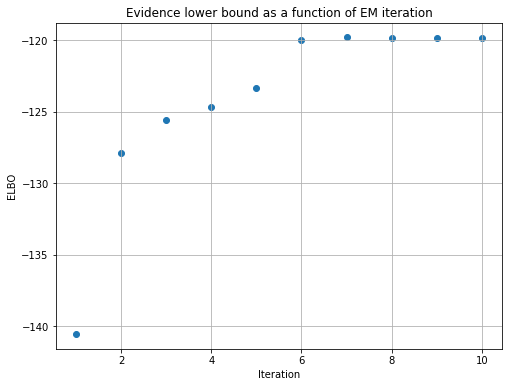

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], y = elbo)
plt.xlabel('Iteration')
plt.ylabel('ELBO')
plt.title("Evidence lower bound as a function of EM iteration")
plt.grid()
plt.show()

# 4 Evaluating PRS prediction

In [ ]:
snp

,mu,tau,gamma
rs7771989,0.529290,444.544107,0.990000
rs4307191,-0.042610,444.544107,0.010000
rs10499125,-0.046572,444.544107,0.010000
rs7349870,-0.037800,444.544107,0.010000
rs6905496,-0.039621,444.544107,0.010000
...,...,...,...
rs342639,0.023182,444.544107,0.010000
rs554333,0.010470,444.544107,0.010000
rs9482443,0.076177,444.544107,0.012692
rs9885799,0.078685,444.544107,0.013820


In [ ]:
gamma = snp["gamma"]
mu = snp["mu"]

In [ ]:
y_train_hat = np.matmul(X_train.to_numpy(), (gamma * mu).to_numpy()).astype('float64')
y_test_hat = np.matmul(X_test.to_numpy(), (gamma * mu).to_numpy()).astype('float64')

In [ ]:
y_train = y_train["beta"].to_numpy().astype('float64')
y_test = y_test["beta"].to_numpy().astype('float64')

R = 0.6925532606556816
R = 0.4893344537551845


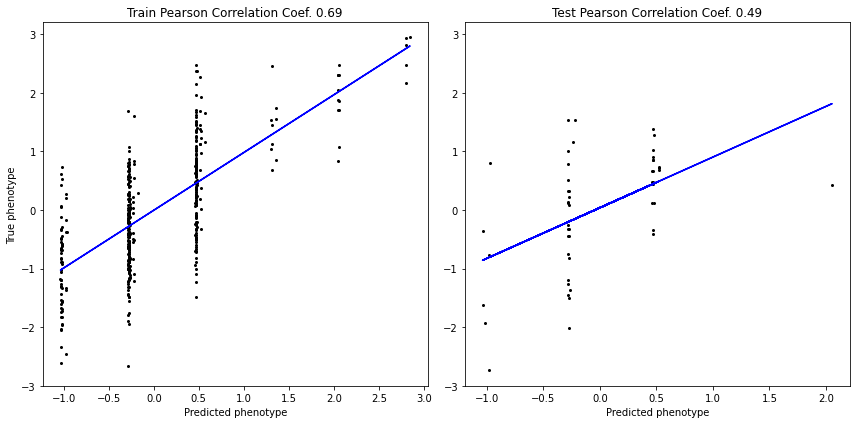

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
plt.subplot(1, 2, 1)
model = np.polyfit(y_train_hat, y_train, 1)
predict = np.poly1d(model)
y_lin_reg = predict(y_train_hat)
r2 = r2_score(y_train, predict(y_train_hat))
plt.title("Train Pearson Correlation Coef. {:.2f}".format(math.sqrt(r2)))
print("R = " + str(math.sqrt(r2)))
plt.ylabel("True phenotype")
plt.xlabel("Predicted phenotype")
plt.scatter(y_train_hat, y_train, c = 'k', s=4)
plt.plot(y_train_hat, y_lin_reg, c = 'b')
plt.ylim([-3, 3.2])

plt.subplot(1, 2, 2)
model2 = np.polyfit(y_test_hat, y_test, 1)
predict2 = np.poly1d(model2)
y_lin_reg2 = predict2(y_test_hat)
r2 = r2_score(y_test, predict(y_test_hat))
plt.scatter(y_test_hat, y_test, c = 'k', s=4)
plt.plot(y_test_hat, y_lin_reg2, c = 'b')
plt.ylim([-3, 3.2])
plt.title("Test Pearson Correlation Coef. {:.2f}".format(math.sqrt(r2)))
print("R = " + str(math.sqrt(r2)))
plt.xlabel("Predicted phenotype")
plt.tight_layout()

plt.show()

# 5 Evaluating fine-mapping

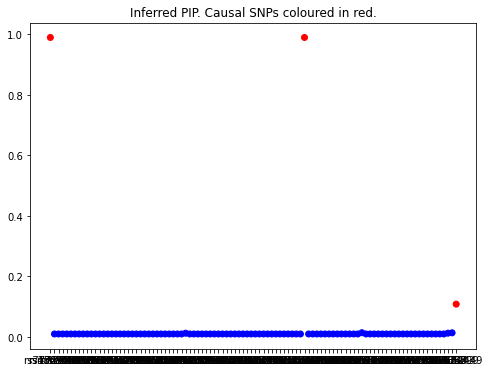

In [ ]:
plt.figure(figsize = (8,6))
colors = np.where(snp["gamma"]>0.05,'r','b')
plt.scatter(x=snp.index, y=snp["gamma"].to_numpy(), c=colors)
plt.title("Inferred PIP. Causal SNPs coloured in red.")
plt.show()